RELATION OF THE TIKVAH TO THE SUBSCRPTION OF BOA CHANNEL AND APP DOWNLOAD

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [47]:
def load_data():
    # Load data from each CSV file
    Boa_data = pd.read_csv('../data/bank_ads.csv')
    BOA_app_install_count = pd.read_csv('../data/installations.csv')
    telegram_subscriptions = pd.read_csv('../data/daily_telegram_subscriptions.csv')
    playstore_reviews_info = pd.read_csv('../data/playstore_reviews.csv')
    
    # Display the dataframes
    print("Boa_data:")
    print(Boa_data.head())

    print("\nBOA_app_install_count:")
    print(BOA_app_install_count.head())

    print("\nTelegram_subscriptions:")
    print(telegram_subscriptions.head())

    print("\nPlaystore_reviews_info:")
    print(playstore_reviews_info.head())

    return Boa_data, BOA_app_install_count, telegram_subscriptions, playstore_reviews_info

# Fetch data
Boa_data, BOA_app_install_count, telegram_subscriptions, playstore_reviews_info = load_data()

Boa_data:
                  date                          post_link    view  post_hour  \
0  2024-05-14 07:49:21  https://t.me/tikvahethiopia/87636  250563          7   
1  2024-05-10 13:39:46  https://t.me/tikvahethiopia/87532  280453         13   
2  2024-05-07 10:46:34  https://t.me/tikvahethiopia/87496  304613         10   
3  2024-04-30 17:01:34  https://t.me/tikvahethiopia/87344  234559         17   
4  2024-04-26 18:11:43  https://t.me/tikvahethiopia/87236  263872         18   

  bank time_of_day  
0  BOA     Morning  
1  BOA   Afternoon  
2  BOA     Morning  
3  BOA   Afternoon  
4  BOA     Evening  

BOA_app_install_count:
         date  installation_count
0  2017-01-01              397581
1  2017-01-02              397581
2  2017-01-03              397581
3  2017-01-04              397581
4  2017-01-05              397581

Telegram_subscriptions:
         date  subscribers
0  2017-01-01       161595
1  2017-01-02       161595
2  2017-01-03       161595
3  2017-01-04       16

In [49]:
def date_convert(date):
# Convert the date columns to datetime
# Convert the date columns to datetime
 Boa_data['date'] = pd.to_datetime(Boa_data['date'], errors='coerce')
 BOA_app_install_count['date'] = pd.to_datetime(BOA_app_install_count['date'], errors='coerce')
 telegram_subscriptions['date'] = pd.to_datetime(telegram_subscriptions['date'], errors='coerce')
 playstore_reviews_info['at'] = pd.to_datetime(playstore_reviews_info['at'], errors='coerce')


In [51]:
   # Aggregate the sentiment data to a daily level
daily_sentiment = playstore_reviews_info.groupby([playstore_reviews_info['at'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Reset the index and rename the columns
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)
daily_sentiment = daily_sentiment.rename_axis('date').reset_index()

# Merge all DataFrames on the 'date' column
merged_df = pd.merge(Boa_data, BOA_app_install_count, on='date', how='outer')
merged_df = pd.merge(merged_df, telegram_subscriptions, on='date', how='outer')
merged_df = pd.merge(merged_df, daily_sentiment, on='date', how='outer')

# Fill missing values with 0 for sentiment columns
sentiment_cols = ['positive', 'negative', 'neutral']
for col in sentiment_cols:
    if col not in merged_df:
        merged_df[col] = 0

merged_df[sentiment_cols] = merged_df[sentiment_cols].fillna(0)


# Visualization

In [55]:
# Plot install count over time
def plot_install_count():
 plt.figure(figsize=(14, 7))
 sns.lineplot(data=merged_df, x='date', y='installation_count', label='Install Count')
 plt.title('Daily Install Count Over Time')
 plt.xlabel('Date')
 plt.ylabel('Install Count')
 plt.legend()
 plt.show()
 

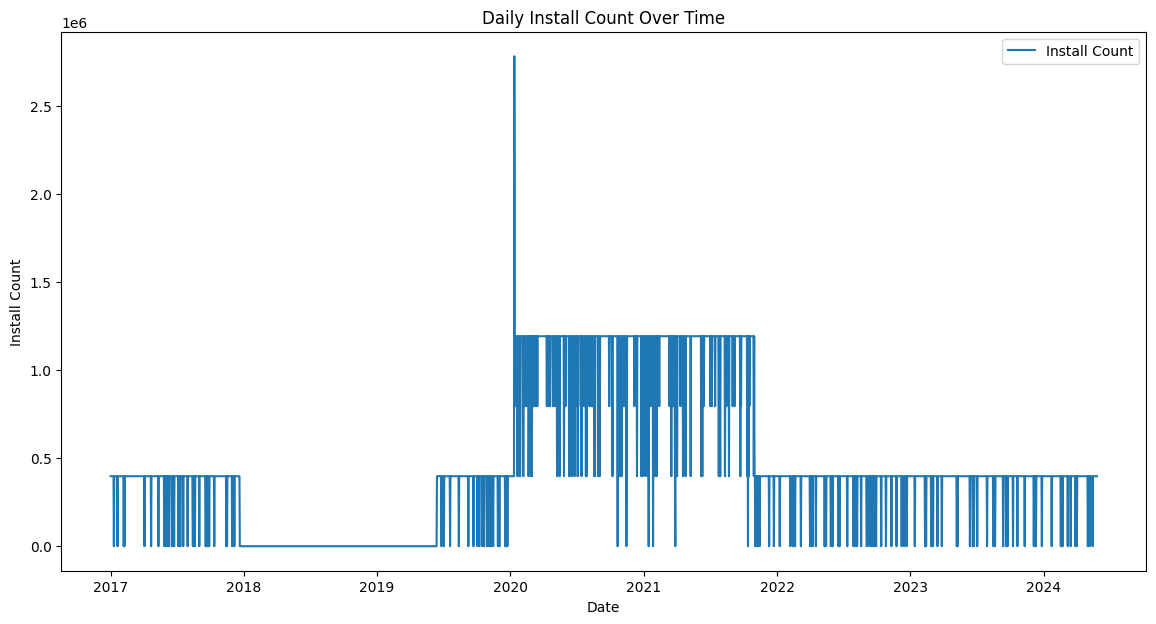

In [56]:
plot_install_count()

In [57]:
def plot_subscribe_count():
# Plot subscriber count over time
 plt.figure(figsize=(14, 7))
 sns.lineplot(data=merged_df, x='date', y='subscribers', label='Subscribers')
 plt.title('Subscribers Over Time')
 plt.xlabel('Date')
 plt.ylabel('Subscribers')
 plt.legend()
 plt.show()

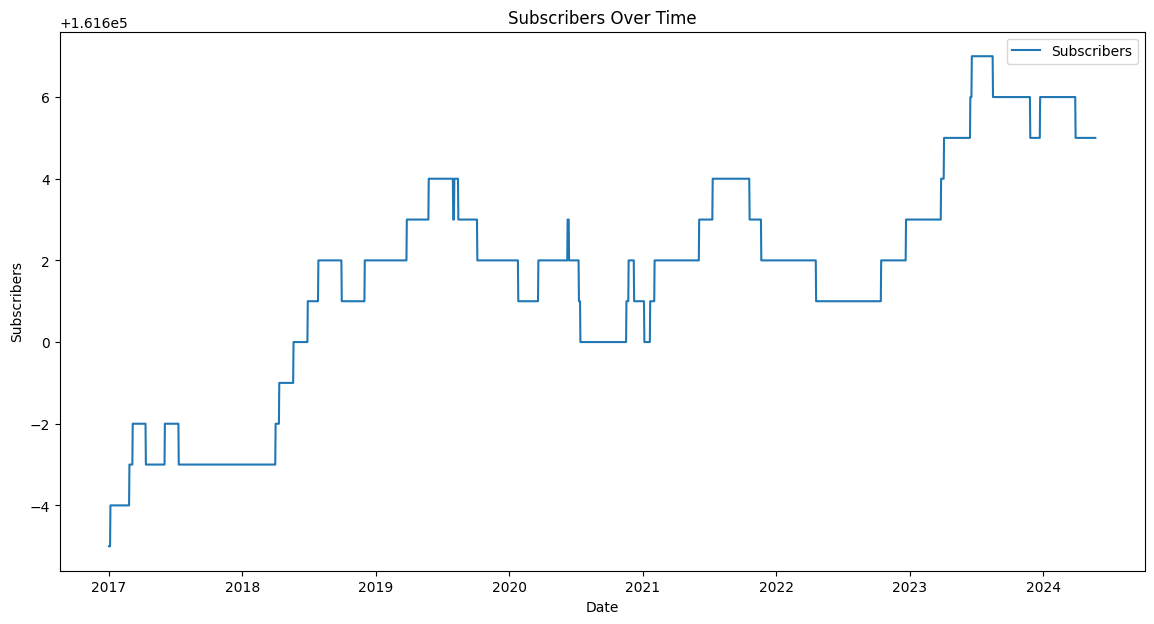

In [58]:
plot_subscribe_count()

In [60]:

# Plot sentiment over time
def plot_sentiment_count():
 plt.figure(figsize=(14, 7))
 sns.lineplot(data=merged_df, x='date', y='positive', label='Positive Sentiment')
 sns.lineplot(data=merged_df, x='date', y='negative', label='Negative Sentiment')
 sns.lineplot(data=merged_df, x='date', y='neutral', label='Neutral Sentiment')
 plt.title('Daily Sentiment Over Time')
 plt.xlabel('Date')
 plt.ylabel('Sentiment Count')
 plt.legend()
 plt.show()

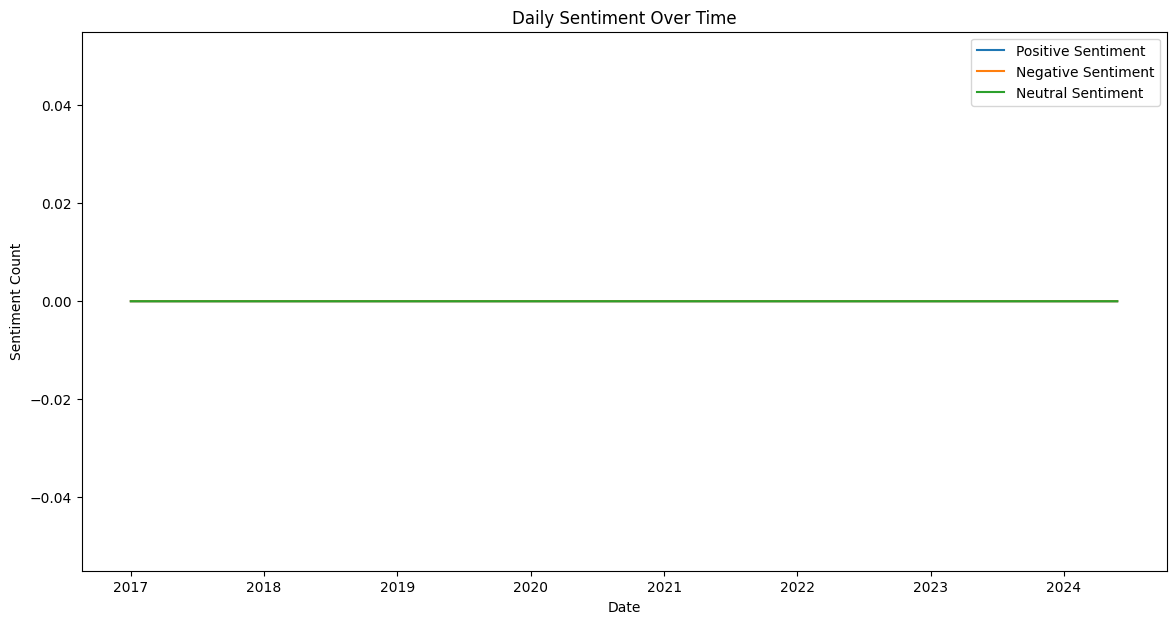

In [61]:
plot_sentiment_count()

In [64]:
# Correlation Analysis
def plot_correlation_analysis():
# Calculate the correlation matrix
 correlation_matrix = merged_df[['installation_count', 'subscribers'] + sentiment_cols].corr()

# Plot the correlation matrix
 plt.figure(figsize=(10, 8))
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
 plt.title('Correlation Matrix')
 plt.show()

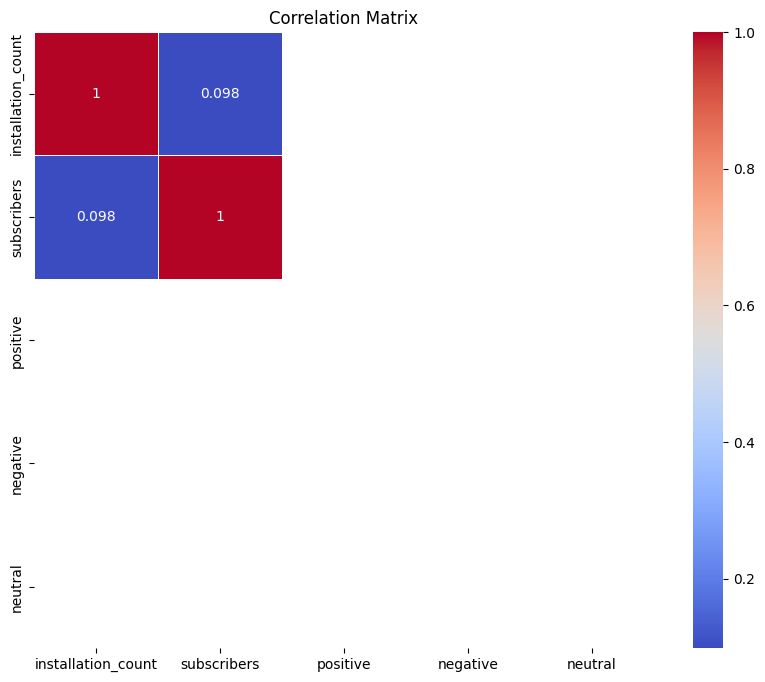

In [65]:
plot_correlation_analysis()

In [68]:
def time_series():
# Time Series Decomposition for Install Count
 decomposition = seasonal_decompose(merged_df.set_index('date')['installation_count'].fillna(0), model='additive', period=30)

 plt.figure(figsize=(14, 10))
 plt.subplot(411)
 plt.plot(decomposition.observed, label='Observed')
 plt.legend(loc='upper left')
 plt.subplot(412)
 plt.plot(decomposition.trend, label='Trend')
 plt.legend(loc='upper left')
 plt.subplot(413)
 plt.plot(decomposition.seasonal, label='Seasonal')
 plt.legend(loc='upper left')
 plt.subplot(414)
 plt.plot(decomposition.resid, label='Residual')
 plt.legend(loc='upper left')
 plt.tight_layout()
 plt.show()


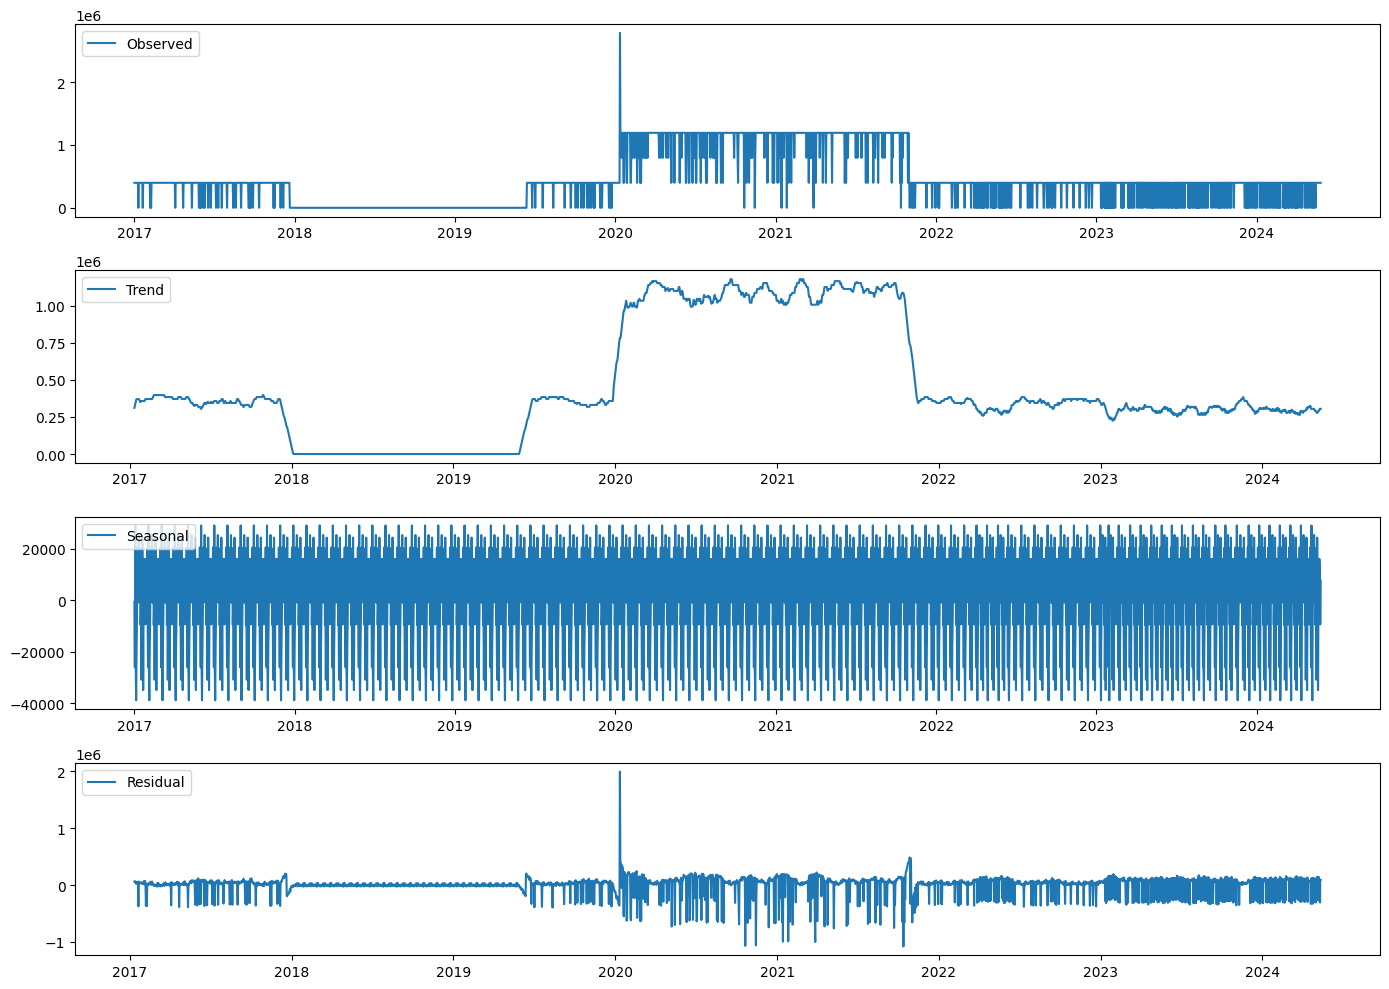

In [69]:
time_series()